<a href="https://colab.research.google.com/github/stvdll/Python-Projects/blob/main/Senitiment_Analysis_of_Product_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from transformers import pipeline
import numpy as np



pipe = pipeline("text-classification", model="Kaludi/Reviews-Sentiment-Analysis")


data = pd.read_csv('/content/Reviews And Ratings.csv') ## This dataset shows the reviews of a specific online product.

data = data[['Date','Country','translated']].sample(frac=1) ## shuffling through the data

data['sentiment'] = None ## with an Open Source Natural Language Processing (NLP)Modell, we want to examine clients feedback. The modell also gives use the the confindece of it's decison.
data['confidence'] = None


for i in range(100): ## Demonstration: Only using a subset of data_entries in order to save processing time and computational resources

  sentiment = list(pipe(data['translated'].iloc[i])[0].values())
  data['sentiment'].iloc[i] = sentiment[0]

  data['confidence'].iloc[i] = sentiment[1]

In [34]:

sentiment_count = data['sentiment'].value_counts()
sentiment_max = sentiment_count.max()

overall_confidence = data ['confidence'].mean()

overall_sentiment =sorted( dict(sentiment_count))[-1]

print('Mean sentiment:', overall_sentiment)
print('Mean Confidence:', overall_confidence)

print('Anzahl der Reviews', 100 ) # would have been: len(data['translated'])

Mean sentiment: Positive
Mean Confidence: 0.9604931998252869
Anzahl der Reviews 100


Text(0.5, 1.0, 'Overall Confidence')

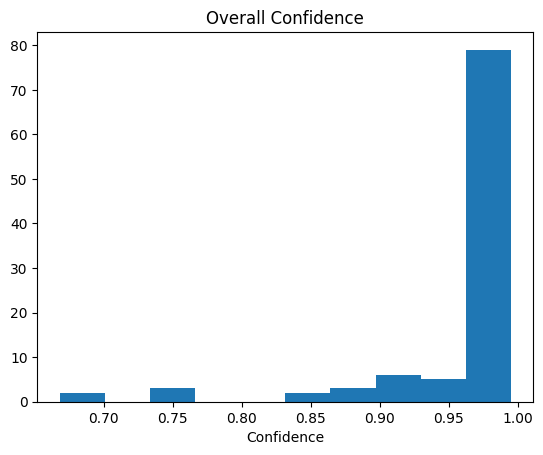

In [35]:
import matplotlib.pyplot as plt

plt.hist(data['confidence'].dropna())
plt.xlabel('Confidence')
plt.title('Overall Confidence')

Text(0.5, 1.0, 'Positive Sentiment by Country')

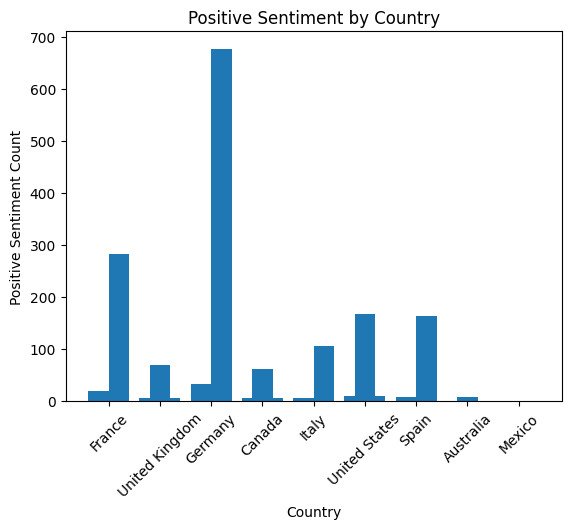

In [33]:
plt.hist(data['Country'], bins= 20)

def country_sentimetn():

  dic = {}

  Countries = set(data['Country'])
  for i in Countries:
    country_positive = len(data.loc[(data['Country'] == i) & (data['sentiment'] == 'Positive')])
    dic[i] = country_positive

  return list(dic.keys()), list(dic.values())

x,y = country_sentimetn()



plt.bar(x, y)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Positive Sentiment Count')
plt.title('Positive Sentiment by Country')

